# Email/SMS Spam Classifier

- Dataset downloaded from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data

In [1]:
## importing the required libraries
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.shape

(5572, 5)

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
## drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.shape

(5572, 2)

In [9]:
## rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample()

,target,text
4142,spam,In The Simpsons Movie released in July 2007 na...


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df['target']=le.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [15]:
## check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.dtypes

target     int32
text      object
dtype: object

In [17]:
## check for duplicat values
df.duplicated().sum()

403

In [18]:
## remove duplicates
df=df.drop_duplicates(keep='first')

In [19]:
df.shape

(5169, 2)

# EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

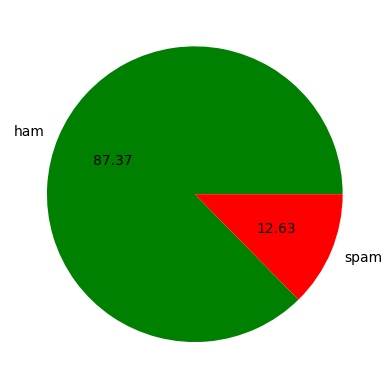

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f", colors=['green','red'])
plt.show()

In [23]:
## Here the data is imbalanced

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_of_characters']=df['text'].apply(len)

C:\Users\Yash\AppData\Local\Temp\ipykernel_5156\2876955473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_characters']=df['text'].apply(len)


In [27]:
df.shape

(5169, 3)

In [28]:
df

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [29]:
import nltk

In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
## num  of words
df['num_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Yash\AppData\Local\Temp\ipykernel_5156\4069911864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [32]:
df.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
## num  of sentence
df['num_of_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Yash\AppData\Local\Temp\ipykernel_5156\1513369364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [34]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_of_characters','num_of_words','num_of_sent']].describe()

,num_of_characters,num_of_words,num_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
## for ham
df[df['target']==0][['num_of_characters','num_of_words','num_of_sent']].describe()

,num_of_characters,num_of_words,num_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
## for spam
df[df['target']==1][['num_of_characters','num_of_words','num_of_sent']].describe()

,num_of_characters,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
import seaborn as sns

<Axes: xlabel='num_of_characters', ylabel='Count'>

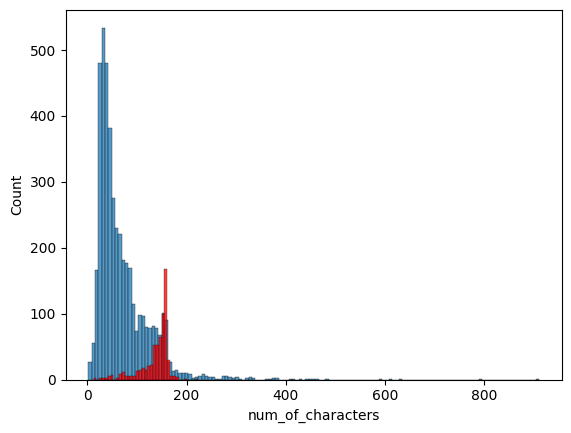

In [39]:
sns.histplot(df[df['target']==0]['num_of_characters']) ## histogram for ham messages
sns.histplot(df[df['target']==1]['num_of_characters'],color='red') ## histogram for spam messages

<Axes: xlabel='num_of_words', ylabel='Count'>

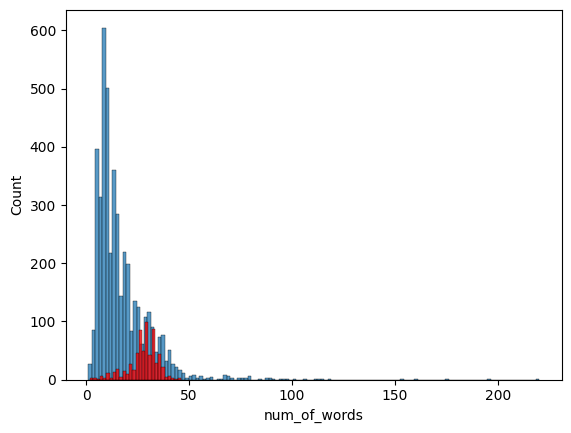

In [40]:
sns.histplot(df[df['target']==0]['num_of_words']) ## histogram for ham messages
sns.histplot(df[df['target']==1]['num_of_words'],color='red') ## histogram for spam messages

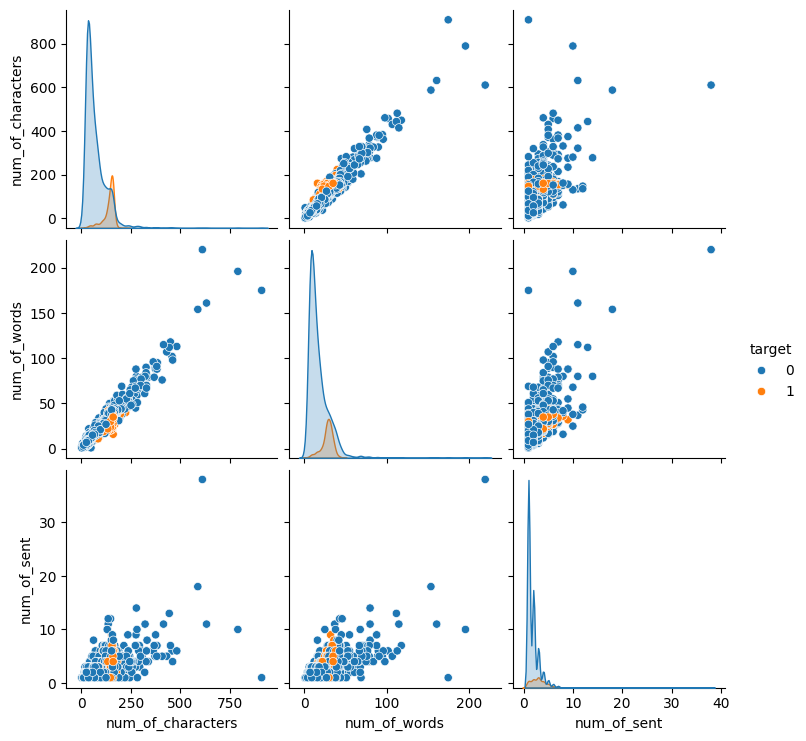

In [41]:
sns.pairplot(df,hue='target')

<Axes: >

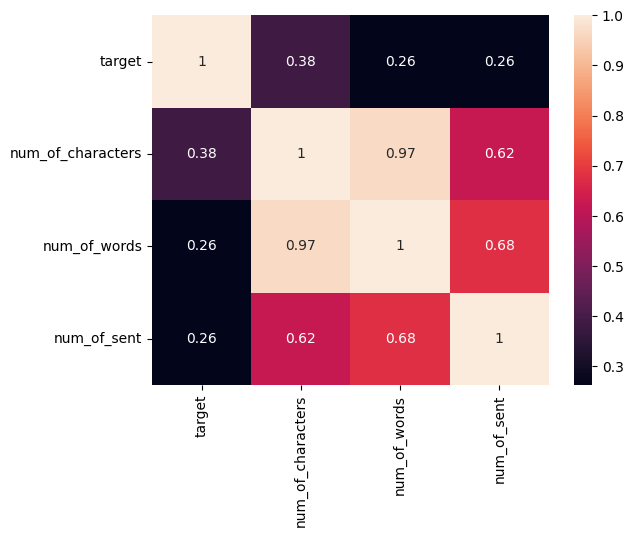

In [42]:
numeric_df=df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(),annot=True)

In [43]:
df.dtypes

target                int32
text                 object
num_of_characters     int64
num_of_words          int64
num_of_sent           int64
dtype: object

In [44]:
df

,target,text,num_of_characters,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


# Data Preprocessing
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [49]:
## creating a function to transform the text -->
def transform_text(text):
    text=text.lower() ## lower case
    text=nltk.word_tokenize(text)  ## tokenization
    y=[]
    for i in text:  ## removing special characters
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:  ## removing stopwords and punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) 
            
    text=y[:]
    y.clear()
    
    for i in text:  ## stemming
        y.append(ps.stem(i))
    
    return " ".join(y)

In [50]:
transform_text("20 10's ; Hello How are you Yash  % @ $")

'20 10 hello yash'

In [51]:
transform_text("I enjoyed ML tutorials on YouTube.")

'enjoy ml tutori youtub'

In [52]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [53]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [54]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\Yash\AppData\Local\Temp\ipykernel_5156\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [55]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
## top words which are occuring in spam messages
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

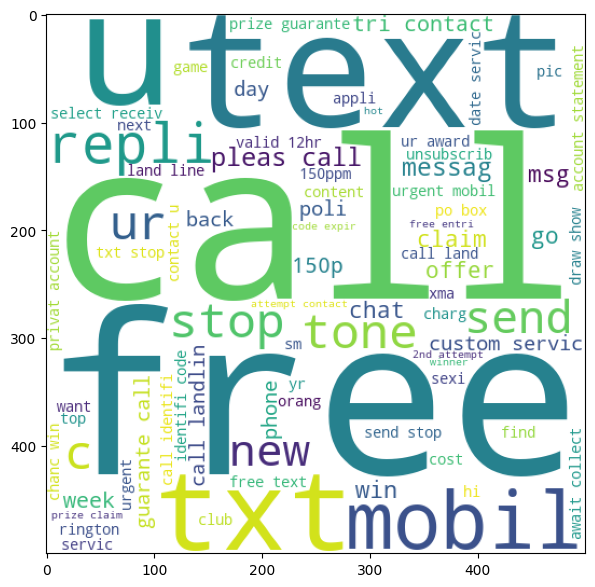

In [57]:
plt.figure(figsize=(7,7))
plt.imshow(spam_wc)

In [58]:
## top words which are occuring in ham messages
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

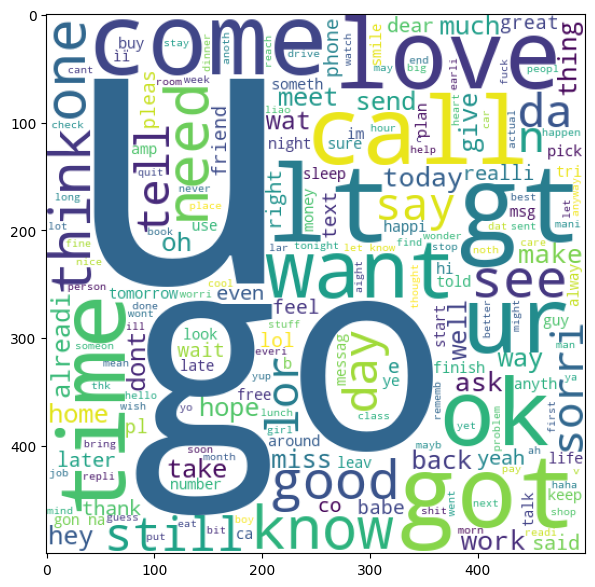

In [59]:
plt.figure(figsize=(7,7))
plt.imshow(ham_wc)

In [60]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

9939

In [63]:
## Highly used 30 words used in spam messages
from collections import Counter
spam_corpus_df=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [64]:
spam_corpus_df.columns=['Word','Count']

In [65]:
spam_corpus_df

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


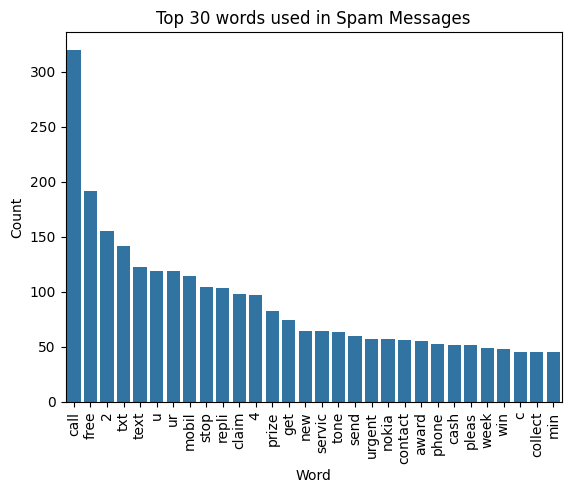

In [66]:
sns.barplot(x='Word',y='Count',data=spam_corpus_df)
plt.title("Top 30 words used in Spam Messages")
plt.xticks(rotation='vertical')
plt.show()

In [67]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [68]:
len(ham_corpus)

35404

In [69]:
## Highly used 30 words used in ham messages
from collections import Counter
ham_corpus_df=pd.DataFrame(Counter(ham_corpus).most_common(30))

In [70]:
ham_corpus_df.columns=['Word','Count']

In [71]:
ham_corpus_df

,Word,Count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


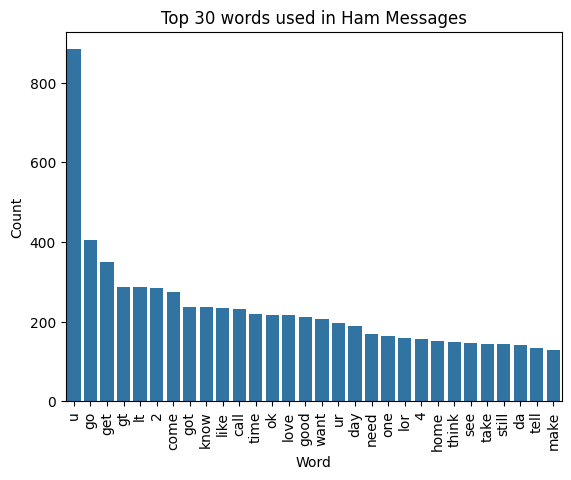

In [72]:
sns.barplot(x='Word',y='Count',data=ham_corpus_df)
plt.title("Top 30 words used in Ham Messages")
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [74]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [75]:
X.shape

(5169, 6708)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [77]:
x=scaler.fit_transform(X)

In [78]:
y=df['target'].values

In [79]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
y.shape

(5169,)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [84]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [85]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print("GaussianNB","-"*20)
print()
print("Accuracy Score : ",accuracy_score(y_test,y_pred_gnb))
print("Precision Score : ",precision_score(y_test,y_pred_gnb))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_gnb))

GaussianNB --------------------

Accuracy Score :  0.8800773694390716
Precision Score :  0.5315315315315315
Confusion Matrix 
 [[792 104]
 [ 20 118]]


In [86]:
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print("MultinomialNB","-"*20)
print()
print("Accuracy Score : ",accuracy_score(y_test,y_pred_mnb))
print("Precision Score : ",precision_score(y_test,y_pred_mnb))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_mnb))

MultinomialNB --------------------

Accuracy Score :  0.9642166344294004
Precision Score :  0.8344370860927153
Confusion Matrix 
 [[871  25]
 [ 12 126]]


In [87]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
print("BernoulliNB","-"*20)
print()
print("Accuracy Score : ",accuracy_score(y_test,y_pred_bnb))
print("Precision Score : ",precision_score(y_test,y_pred_bnb))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_bnb))

BernoulliNB --------------------

Accuracy Score :  0.9700193423597679
Precision Score :  0.9734513274336283
Confusion Matrix 
 [[893   3]
 [ 28 110]]


In [88]:
## Applying some other classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [89]:
# Creating a function to evaluate the model
def evaluate_model(true, predicted):
    print("Accuracy Score : ",accuracy_score(true,predicted))
    print("Precision Score : ",precision_score(true,predicted))
    print("Confusion Matrix : \n",confusion_matrix(true,predicted))

In [90]:
## Model Training
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "SVC":SVC(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    print(list(models.keys())[i],"============>")
    print("Evaluating Train Dataset")
    evaluate_model(y_train,y_train_pred)
    print()
    print("Evaluating Test Dataset")
    evaluate_model(y_test,y_test_pred)
    print()
    print(f"\n{"-"*50}\n")

LogisticRegression ============>
Evaluating Train Dataset
Accuracy Score :  0.9951632406287787
Precision Score :  0.9979879275653923
Confusion Matrix : 
 [[3619    1]
 [  19  496]]

Evaluating Test Dataset
Accuracy Score :  0.9787234042553191
Precision Score :  0.9915254237288136
Confusion Matrix : 
 [[895   1]
 [ 21 117]]


--------------------------------------------------

DecisionTreeClassifier ============>
Evaluating Train Dataset
Accuracy Score :  1.0
Precision Score :  1.0
Confusion Matrix : 
 [[3620    0]
 [   0  515]]

Evaluating Test Dataset
Accuracy Score :  0.9545454545454546
Precision Score :  0.8823529411764706
Confusion Matrix : 
 [[882  14]
 [ 33 105]]


--------------------------------------------------

RandomForestClassifier ============>
Evaluating Train Dataset
Accuracy Score :  1.0
Precision Score :  1.0
Confusion Matrix : 
 [[3620    0]
 [   0  515]]

Evaluating Test Dataset
Accuracy Score :  0.9690522243713733
Precision Score :  1.0
Confusion Matrix : 
 [[896  

In [91]:
RF_classifier=RandomForestClassifier()
RF_classifier.fit(X_train,y_train)
y_pred=RF_classifier.predict(X_test)

evaluate_model(y_test, y_pred)

Accuracy Score :  0.971953578336557
Precision Score :  0.990990990990991
Confusion Matrix : 
 [[895   1]
 [ 28 110]]


In [92]:
cv

CountVectorizer()

In [93]:
scaler

StandardScaler()

In [95]:
RF_classifier

RandomForestClassifier()

In [99]:
transform_text

<function __main__.transform_text(text)>

In [100]:
import pickle
pickle.dump(cv,open('models/count_vectorizer.pkl','wb'))
pickle.dump(scaler,open('models/scaler.pkl','wb'))
pickle.dump(RF_classifier,open('models/model.pkl','wb'))